In [210]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mstats
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [211]:
# Acquire, load, and preview the data.
data = pd.read_csv(
    'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',
    index_col=0
)
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


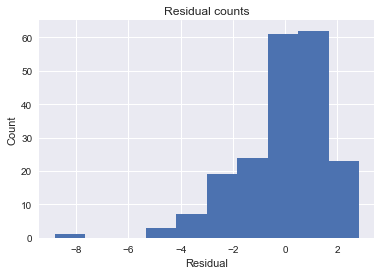

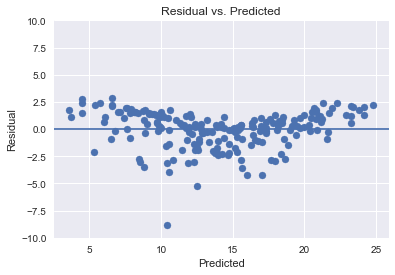

In [212]:
correlation_matrix = X.corr()
display(correlation_matrix)

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
axes.set_ylim([-10, 10])
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

(array([  2.,   9.,  20.,  47.,  35.,  29.,  22.,  17.,  12.,   7.]),
 array([  1.6 ,   4.14,   6.68,   9.22,  11.76,  14.3 ,  16.84,  19.38,
         21.92,  24.46,  27.  ]),
 <a list of 10 Patch objects>)

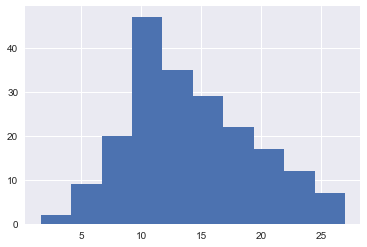

In [214]:
# Drill
# Judging from the diagnostic plots, your data has a problem with both heteroscedasticity
# and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

# Fixing multivariate normality
plt.hist(data["Sales"])

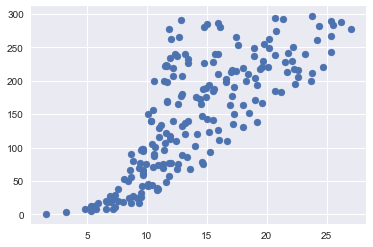

In [215]:
plt.scatter(data["Sales"], data["TV"])

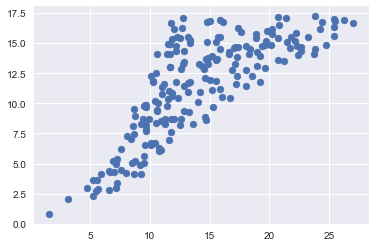

In [216]:
# We can get the square root of this feature and get a more consistent linear correlation
tv_2 = [math.sqrt(x) for x in data["TV"]]

plt.scatter(data["Sales"], tv_2)

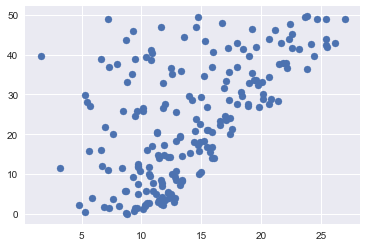

In [217]:
# We do the same for radio and newspaper
# This is a high variance all along, our line is not skewed, we leave as-is

#plt.scatter(data["Sales"], data["Newspaper"])

plt.scatter(data["Sales"], data["Radio"])

In [218]:
data = pd.read_csv(
    'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',
    index_col=0
)

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data["Sales"].values.reshape(-1, 1)

tv_2 = [math.sqrt(x) for x in data["TV"]]
X = data[["Radio", "Newspaper"]]
X["tv_2"] = tv_2

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.94767873e-01  -5.25277959e-04   9.74947557e-01]]

Intercept: 
 [-1.60927984]

R-squared:
0.928954905381


/Users/carl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [219]:
predicted = regr.predict(X).ravel()
actual = data["Sales"]
residual = actual - predicted

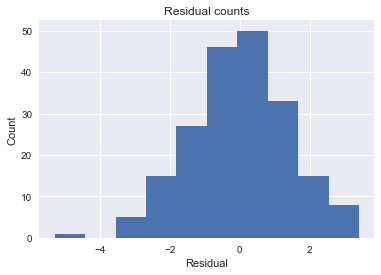

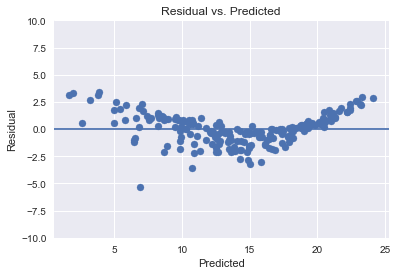

In [220]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
axes = plt.gca()
axes.set_ylim([-10, 10])
plt.show()

In [223]:
print(X.corr())

           Radio  Newspaper  tv_2
Radio      1.000      0.354 0.029
Newspaper  0.354      1.000 0.044
tv_2       0.029      0.044 1.000
